# PyCall Lecture

2017-09-20 RubyData Workshop in RubyKaigi 2017


# Today's Contents

## Outline

1. Preparation
   1. How to install pycall and related libraries
   2. How to install Python for pycall
2. Gettings started to pycall
   1. What is pycall
   2. What can we do by pycall
   3. Mechanisms of pycall
3. Demonstrations

## Goal

- Understanding what is and what can we do pycall
- Understanding how to reproduce the demonstrations
- Joining to Ruby's data science ecosystems

# Preparation

## How to install pycall and related libraries

You can simplly install pycall and related libraries by `gem install` command like below.

```console
$ gem install pycall
$ gem install numpy
$ gem install matplotlib
$ gem install pandas
```

## How to install Python for pycall

Pycall loads the shared library of Python dynamically by using fiddle.
So you must install Python's shared library.

If you use UNIX-like operating system, there are three ways to install Python with its shared library.

1. Using pyenv
2. Using Anaconda
3. Build from source

If you use Windows, the former two ways in this list are available.

### Using pyenv

Pyenv is Python's version manager.  This was made from rbenv; the similarity of their names isn't just contingency.

TBD

In this case, you should use `pip` for installing Python libraries, such as numpy and pandas, which you want to use from Ruby.


### Using Anaconda

https://docs.continuum.io/anaconda/install/

TBD

### Build from source

- https://docs.python.org/3/using/unix.html
- https://docs.python.org/2/using/unix.html

You have to specify `--enable-shared` for the configure script.
You can use `--enable-framework` instead of `--enable-shared` if you use macOS.

In this case, you should use `pip` like the case of pyenv, so you need to install `pip` by using `get-pip.py`.  See the above section for the instruction to install `pip`.

# Getting started to pycall

## What is pycall

Pycall consists of two parts.

1. Ruby binding of Python's shared library, that is `libpython.so`
2. Porotocl translater of object systems between Ruby and Python

CPython provides C APIs that you can use to embed Python interpreter into your application.
The first part is Ruby binding of that APIs.  In this Python C APIs, objects in Python are represented as pointers.
To handle these pointers from Ruby, pycall's fundation is written as a C extension library.

Python と Ruby の間には、オブジェックトシステムの差異もある。Pycall の第2番目の部分は、このオブジェクトシステムの違いを吸収するためのプロトコル変換器である。
例えば、Python ではオブジェクトに丸括弧をつけるだけでそのオブジェクトを呼び出すことができる。
一方 Ruby はそのような構文を持っていないため、`call` メソッドやその糖衣構文である `.()` (ドット丸括弧) を使う必要がある。
Pycall はこのような違いを吸収するため、Ruby 側の記法をできるだけ正確に Python の対応する処理に翻訳する。

## What we can do with pycall

### Importing Python module

`PyCall.import_module` を使うと Python のモジュールを Ruby 側に持って来れます。やってみましょう。

We can take Python modules into Ruby-side by using `PyCall.import_module`.  Let's do that.

In [1]:
require 'pycall'

pymath = PyCall.import_module('math')

<module 'math' from '/Users/mrkn/.pyenv/versions/3.6.1/Python.framework/Versions/3.6/lib/python3.6/lib-dynload/math.cpython-36m-darwin.so'>

変数 `pymath` が Python の math モジュールを保持しています。この math モジュールは、Ruby オブジェクトで包まれています。この Python オブジェクトを包んでいる Ruby オブジェクトをラッパーオブジェクトと呼びます。

The variable `pymath` holds Python math module. This math module is enclosed by a Ruby object. A Ruby object that encloses a Python object like this is called a wrapper object.

PyCall はオブジェクトの属性にアクセスするためのメソッドをラッパーオブジェクトに定義します。
例えば、Python の `math.pi` は、ここでは `pymath` の `pi` メソッドを呼び出すことでアクセスできます。

PyCall defines methods in wrapper objects, that is used for accessing objects' attributes.
So we can access Python's `math.pi` by calling `pi` method of the wrapper object in the variable `pymath`.

In [2]:
pymath.pi

3.141592653589793

この値は Ruby の浮動小数点数です。これは、Python の浮動小数点数から自動変換されています。

This value is Ruby's Float object that is automatically converted from Python's float object.

In [3]:
pymath.pi.class

Float

Python オブジェクトのインスタンスメソッドは、Ruby 側でもラッパーオブジェクトのインスタンスメソッドになります。
ですから、Python の `math.sin` は、`pymath.sin` になります。

In [4]:
pymath.sin(pymath.pi)

1.2246467991473532e-16

ちなみに、Python の `math.pi` の値は Ruby の `Math::PI` の値と等しいです。

In [5]:
pymath.pi == Math::PI

true

そして、Python の sin と Ruby の sin の結果も等しくなります。

In [6]:
pymath.sin(pymath.pi) == Math.sin(Math::PI)

true

Ruby の Float オブジェクトは Python の浮動小数点数に自動変換されて Python の関数やメソッドに渡されます。

In [7]:
pymath.sin(Math::PI)

1.2246467991473532e-16

このように、PyCall は Ruby から Python のオブジェクトをいじるための仕組みが実装されていて、Python のオブジェクトを Ruby から極めて自然に扱えます。

`PyCall.import_module` は自分で書いた Python コードに対しても使えます。`PyCall.sys.path` が Python の `sys.path` に相当するので、ここに自分で書いた Python コードがあるディレクトリのパスを追加してあげれば、その中にある Python コードをモジュールとしてインポートできます。

例えば、以下の Ruby スクリプトは、同じディレクトリ内にある `foo.py` をインポートします。

```ruby
require 'pycall'
PyCall.sys.path.append('.')  # Append the current directory
foo = PyCall.import_module('foo')
```

### Executing Python code

Python で記述したい処理があるが、独立したファイルに置くには小さいと感じる場合、`PyCall.exec` と `PyCall.eval` を使うと Ruby スクリプト中に Python コードを埋め込めます。
`PyCall.exec` は、クラス定義などのステートメントを実行するために使います。対して `PyCall.eval` は、式を評価するために用います。

In [8]:
### TODO:

## Mechanisms of pycall

In this section, we describes the mechanisms how pycall bridges between Ruby and Python.

The contents in this section is:

- The object system of pycall
- The type conversion system of pycall
- The amount of the overhead of pycall

---

- Python の type 型のオブジェクトは他の型のオブジェクトと区別しておきたいので、そのポインタを `PyTypePtr` オブジェクトとして boxing する。
- Ruby オブジェクトを Python 側に持って行く際に Python 側に作るオブジェクトも他と区別しておきたいので、そのポインタを `PyRubyPtr` オブジェクトとして boxing する。
- いくつかの例外を除き、Python オブジェクトは一般に `PyObjectWrapper` モジュールを extend したオブジェクトによってラップされる。
- Python の type 型のオブジェクトに対しては Class オブジェクトによってラップする。
- Python の module 型のオブジェクトは Ruby の Module クラスのオブジェクトでラップする。
- PyCall は Python の型 (クラス) と Ruby のクラスの対応表を持ち、Python オブジェクトのラッパーオブジェクトを作る際にその対応表の中から対応する Ruby のクラスを探す。


### Pycall's object system

In C language layer, a Python object is represented as a pointer that indicates the address of a `PyObject` structure.
Pycall handles such pointers by putting into a `PyCall::PyPtr` object.

For example, the following Ruby code,

```ruby
pymath = PyCall.import_module("math")
```

that imports Python's math module, acts like the following diagram.

![](pymath.png)

### Pycall's type system

- 型の対応
- 自動型変換
- register_python_type_mapping

### Pycall's overhead

上で Python と Ruby で $sin(\pi)$ の結果が等しいことを確かめました。
ここでは、両者の実行速度を比較してみましょう。

In [16]:
require 'benchmark'
Benchmark.bm(7) do |x|
  x.report("ruby:")   { 1_000_000.times { Math.sin(Math::PI) } }
  x.report("python:") { 1_000_000.times { pymath.sin(pymath.pi) } }
end
nil

              user     system      total        real
ruby:     0.100000   0.010000   0.110000 (  0.104201)
python:   0.960000   0.040000   1.000000 (  1.056992)


このように、100万回実行した時の実行時間を比べると、Ruby の `Math.sin(Math::PI)` の方が10倍ほど速いようです。
これが pycall によるブリッジ処理のオーバーヘッドです。

浮動小数点数の sin 関数のように計算量が小さい場合、pycall のオーバーヘッドは非常に大きな比重を占めます。
では、大きな行列同士の積のように計算量が大きい場合はどうなるでしょう？
Ruby の ruby-numo と Python の numpy/scipy で BLAS 関数の実行時間を比較した Jupyter notebook があるので確認してみましょう。

https://github.com/mrkn/numpy.rb/blob/master/example/benchmarking.ipynb

このように、そもそも長い計算時間が必要な処理を呼び出す場合は pycall のオーバーヘッドを気にしなくて良いのです。そして、pycall が必要になる場合のほとんどが、このようにオーバヘッドを気にしなくて良い場合だと思います。

# Demonstrations

## Reading Data, Calculating PCA, and Visualize the results

In [ ]:
require 'numpy'

require 'pandas'
Pandas.options.display.max_rows = 20

require 'matplotlib/iruby'
Matplotlib::IRuby.activate

CSV ファイルを読んで Pandas のデータフレームにします。

In [9]:
iris = Pandas.read_csv("data/iris.csv", header: 0)

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


このように 150 x 5 の表が読み込まれました。`virginica` カラムの値がラベルを意味するので、この値に対して色を割り当て、PCA した結果のち重要な2次元を取り出して可視化してみます。

まず、データフレームの 0〜3 列目を取り出し、numpy の配列に変換します。

In [10]:
x = Numpy.asarray(iris.iloc[0..-1, 0..3])

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

次に、PCA を計算する関数 `pca` を定義します。
PCA は平均を引き、特異値分解をして、元のベクトルと特異ベクトル行列を掛け算することで計算できます。

In [11]:
def pca(x)
  x_bar = x - Numpy.mean(x, 0)
  u, s, v = *Numpy.linalg.svd(x)
  x_bar.dot v
end

x_pca = pca(x)

array([[ -8.15149049e-01,   2.43830403e+00,   6.74472970e-01,
          4.97388864e-01],
       [ -8.07830919e-01,   2.24181683e+00,   1.13155253e+00,
          7.03343955e-01],
       [ -6.50373495e-01,   2.49425495e+00,   1.09787495e+00,
          7.21998022e-01],
       [ -5.03955030e-01,   2.34273982e+00,   1.20913595e+00,
          6.65202022e-01],
       [ -7.11449148e-01,   2.53077185e+00,   6.54898189e-01,
          4.79700953e-01],
       [ -7.11648955e-01,   2.27556728e+00,   1.24397279e-01,
          2.96836588e-01],
       [ -4.35802624e-01,   2.54158492e+00,   9.53860831e-01,
          6.90706663e-01],
       [ -7.18672962e-01,   2.35429140e+00,   7.91205955e-01,
          4.94622753e-01],
       [ -4.60829990e-01,   2.37722204e+00,   1.45901787e+00,
          8.21759468e-01],
       [ -7.61650941e-01,   2.26092763e+00,   1.10326815e+00,
          5.39935934e-01],
       [ -9.33390895e-01,   2.36584298e+00,   3.73275957e-01,
          3.24043484e-01],
       [ -5.18496974e

PCA の結果である `x_pca` を matplotlib の scatter plot で可視化します。

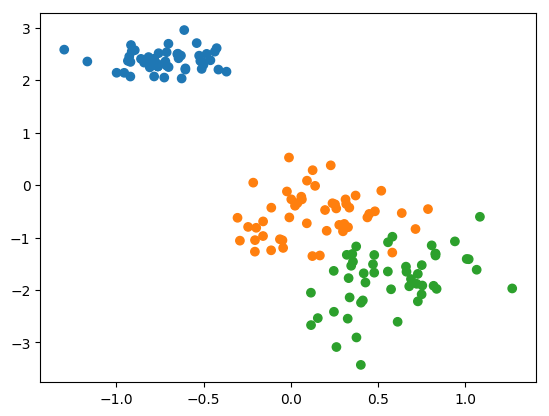

In [12]:
plt = Matplotlib::Pyplot
spices = iris[:virginica]
colors = spices.tolist.map {|s| "C#{s}" }
plt.scatter(x_pca[0..-1, 0], x_pca[0..-1, 1], c: colors)

## Visualize Benchmarking Results

Ruby で計算したベンチマークの結果を seaborn ライブラリを使って棒グラフにします。

まずはベンチマークの結果を作るコードです。ここでは、配列の合計を求める処理を `Array#inject`、`while` ループ、`Array#sum`、`Enumerable#sum` の4つの手法でそれぞれ計算する時間を測定しています。

In [13]:
require 'benchmark'

N, L = 100, 10_000
ary = Array.new(L) { rand }
methods, times = [], []

N.times do
  # Array#inject -------------------------
  methods << :inject
  times << Benchmark.realtime { ary.inject(:+) }
  # while expr ---------------------------
  methods << :while
  times << Benchmark.realtime {
    sum, i = ary[0], 1
    while i < L
      sum += ary[i]; i += 1
    end
  }
  # Array#sum ----------------------------
  methods << :ary_sum
  times << Benchmark.realtime { ary.sum }
  # Enumerable#sum -----------------------
  methods << :enum_sum
  enum = ary.each
  times << Benchmark.realtime { enum.sum }
end

100

測定結果をデータフレームにします。

In [14]:
df = Pandas::DataFrame.new(data: { method: methods, time: times })

,method,time
0,inject,0.000356
1,while,0.000309
2,ary_sum,0.000049
3,enum_sum,0.000178
4,inject,0.000329
5,while,0.000312
6,ary_sum,0.000049
7,enum_sum,0.000164
8,inject,0.000330
9,while,0.000313


そして、データフレームを seaborn に渡して可視化します。

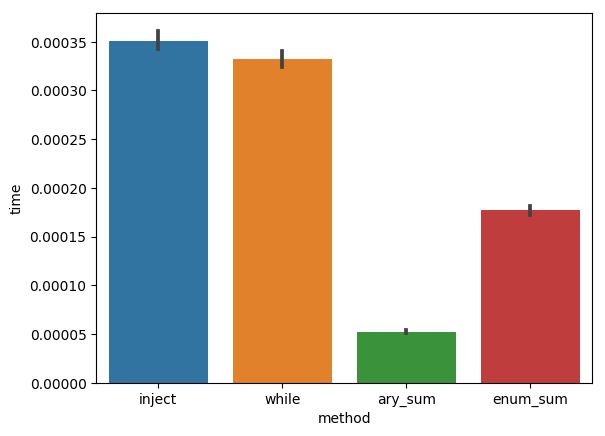

In [15]:
sns = PyCall.import_module('seaborn')
sns.barplot(x: 'method', y: 'time', data: df)

## Using pandas with ActiveRecord

The wrapper library of pandas supports to create a data frame from a connection of ActiveRecord.

You can see the example usage of this feature in the following demonstration Rails app.

https://github.com/mrkn/bugs-viewer-rk2017

## Object Recognition with Keras

TBD